In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_json('/content/drive/MyDrive/Copy of published_jobs_for_job_category_extraction.json')

In [6]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49893 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            49893 non-null  object
 1   title         49893 non-null  object
 2   job_category  49893 non-null  object
 3   raw_content   49893 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [59]:
JOB_CATEGORY_MIN = 1000

In [60]:
import pandas as pd

pd.set_option('display.max_rows', None)

dataset = pd.read_json('/content/drive/MyDrive/Copy of published_jobs_for_job_category_extraction.json')

dataset = dataset.iloc[:, [1,2]]

dataset.dropna(axis=0, inplace=True)

dataset_copy = dataset.copy()

counts_job_category = dataset_copy['job_category'].value_counts()

# dataset_after_minimum_category 

data = dataset_copy.loc[dataset_copy['job_category'].isin(counts_job_category.index[counts_job_category > JOB_CATEGORY_MIN])]

print(data.shape)

(21648, 2)


In [61]:
sample_size = 1000

In [62]:
data = data.groupby('job_category').apply(lambda x: x.sample(sample_size) if len(x) > 280 else x.sample(len(x)))

In [63]:
x = data['title']
y = data['job_category']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0,stratify=y)

In [65]:
import re
import pandas as pd
import spacy
from bs4 import BeautifulSoup
from spacy.lang.en import STOP_WORDS

# stopwords = stopwords()


nlp = spacy.load('en_core_web_sm')


class EnglishPreprocessor:
    
    def replace_character(self, x_data):
      x_data = x_data.replace({'/': ' ', '&': ' ', ',': ' ', '$': ' ', '\n': ' ', '-':' '}, regex=True)
      return x_data

    def remove_space(self, x_data):
        return x_data.apply(lambda x: " ".join(x.split()))

    def remove_punctuations(self, x_data):
        return x_data.apply(lambda x: re.sub('[^A-Z a-z 0-9]+', '', x))

    def to_lower(self, x_data):
        return x_data.apply(lambda x: x.lower())

    def preprocess(self, x_data):
        # Replace Character
        x_data = self.replace_character(x_data)
        # Remove Punctuation and Special Character
        x_data = self.remove_punctuations(x_data)
        # Remove Multiple Space
        x_data = self.remove_space(x_data)
        # To_lower
        x_data = self.to_lower(x_data)

        return x_data

In [66]:
x= EnglishPreprocessor().preprocess(x)

In [67]:
#imports cell 

#basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#NLP imports
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import re

#Classification imports
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier,LogisticRegression

In [68]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),])

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8195


In [69]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),])

sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8265


In [70]:

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.807


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


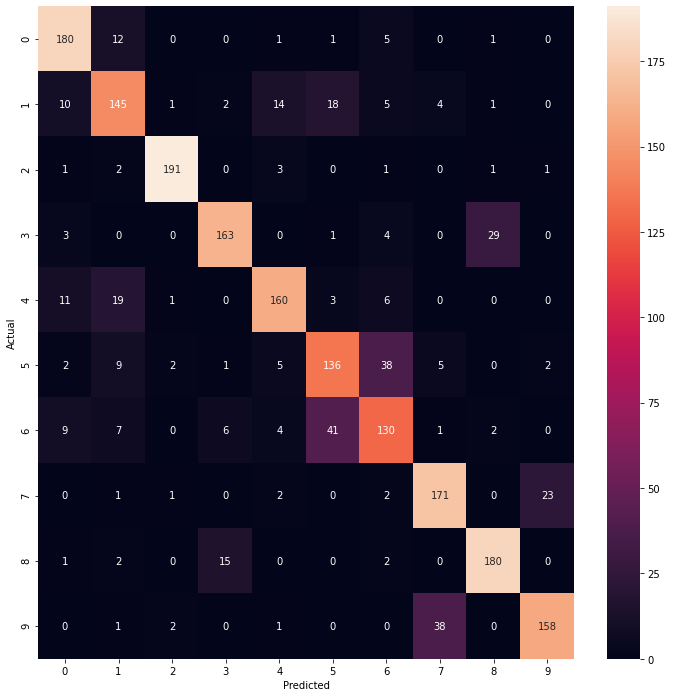

In [71]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [72]:
 from sklearn import tree

In [73]:
dec_tree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', tree.DecisionTreeClassifier()),
               ])
dec_tree.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.807


In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
dec_tree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier()),
               ])
dec_tree.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.807


In [76]:
pd.set_option('display.max_rows', None)
y_train.value_counts().to_frame()

,job_category
Graphic Designer,800
Web Developer,800
Marketing & Sales,800
Accounts Officer,800
Assistant Manager,800
Project Officer,800
Project Manager,800
MBBS Doctor,800
Software/Application Developer,800
Teacher,800


In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
dec_tree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MLPClassifier()),
               ])
dec_tree.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.807


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
pd.set_option('display.max_rows', None)
data["job_category"].value_counts().to_frame()

,job_category
Graphic Designer,1000
Web Developer,1000
Marketing & Sales,1000
Accounts Officer,1000
Assistant Manager,1000
Project Officer,1000
Project Manager,1000
MBBS Doctor,1000
Software/Application Developer,1000
Teacher,1000


In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
from sklearn.svm import SVC

In [82]:
dec_tree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(gamma='auto')),
               ])
dec_tree.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.807
